## data generate

128点数据
- 方波
- 直角三角
- 等腰三角
- 阶梯
- 正弦+随机 + 1/2 + 1/2+1



In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.display import HTML

# %matplotlib notebook

styltStr = '''
<style>
    div.output_scroll{
    height: unset;
    }
</style>
'''
HTML(styltStr)

# define
dataLen = 128

try:
    squareWave = np.load("./data/square_wave.npz")
    rightTriangleWave = np.load("./data/right_triangle_wave.npz")
    isoscelesTriangleWave = np.load("./data/isosceles_triangle_wave.npz")
    stepWave = np.load("./data/step_wave.npz")
    triFunWave = np.load("./data/trifun_wave.npz")
except Exception as e:
    print("打开数据失败,请尝试生成数据",e)

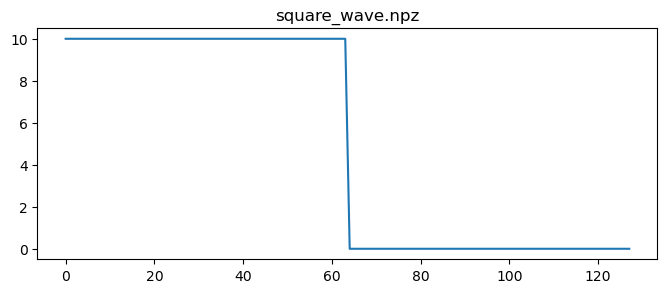

*** 1.0 3.0 12.0


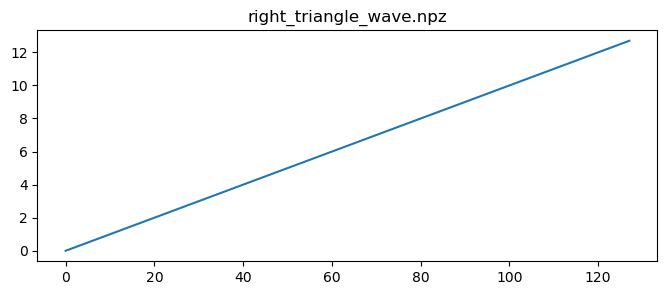

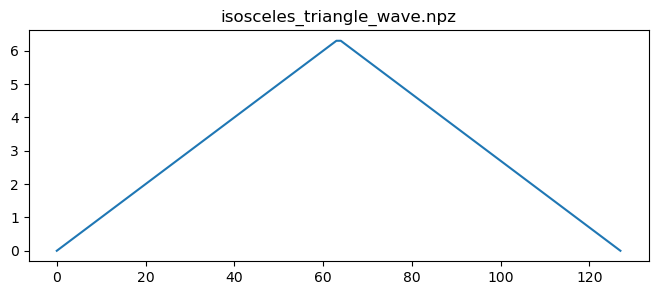

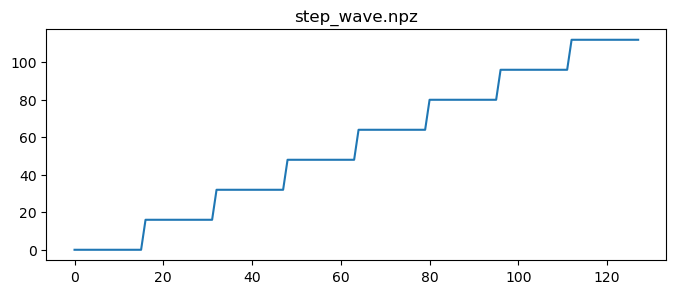

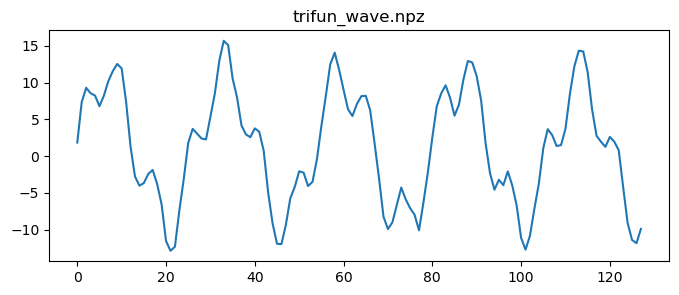

In [7]:

squareWave = {}
wd = squareWave["data"] = np.zeros([dataLen],"float32")
wd[0:wd.shape[0]//2] = 10
np.savez("./data/square_wave.npz",**squareWave)
plt.figure(figsize=(8, 3))
plt.title("square_wave.npz")
plt.plot(range(wd.shape[0]),wd)
plt.show()


rightTriangleWave = {}
wd = rightTriangleWave["data"] = np.empty([dataLen],"float32")
for i in range(wd.shape[0]):
    wd[i] = i*0.1
print("***",wd[10],wd[30],wd[120])
np.savez("./data/right_triangle_wave.npz",**rightTriangleWave)
plt.figure(figsize=(8, 3))
plt.title("right_triangle_wave.npz")
plt.plot(range(wd.shape[0]),wd)
plt.show()



isoscelesTriangleWave = {}
wd = isoscelesTriangleWave["data"] = np.empty([dataLen],"float32")
for i in range(wd.shape[0]//2):
    wd[i] = wd[wd.shape[0]-i-1] = i*0.1
np.savez("./data/isosceles_triangle_wave.npz",**isoscelesTriangleWave)
plt.figure(figsize=(8, 3))
plt.title("isosceles_triangle_wave.npz")
plt.plot(range(wd.shape[0]),wd)
plt.show()


stepWave = {}
wd = stepWave["data"] = np.empty([dataLen],"float32")
step = 8
stepVal = wd.shape[0]//8
for i in range(step):
    wd[i*stepVal:(i+1)*stepVal] = i*stepVal
np.savez("./data/step_wave.npz",**stepWave)
plt.figure(figsize=(8, 3))
plt.title("step_wave.npz")
plt.plot(range(wd.shape[0]),wd)
plt.show()



triFunWave = {}
wd = triFunWave["data"] = np.empty([dataLen],"float32")

def triFun(omega1,fi1,modulus1,
           omega2,fi2,modulus2,
           noiceModulus,
           i,):
    res = np.sin(omega1 * i +fi1)*modulus1 + \
        np.sin(omega2 * i +fi2)*modulus2 + \
        np.random.random()*noiceModulus
    return res

tCnt = wd.shape[0]
omega1 = 2*np.pi/(tCnt/4) * (1.2)
fi1 = omega1//6
modulus1 = 10

omega2 = 2*np.pi/(tCnt/16)
fi2 = omega2/5 *3
modulus2 = 4

noiceModulus = 2
for i in range(wd.shape[0]):
    wd[i] = triFun(omega1,fi1,modulus1,
           omega2,fi2,modulus2,
           noiceModulus,
           i)
np.savez("./data/trifun_wave.npz",**triFunWave)
plt.figure(figsize=(8, 3))
plt.title("trifun_wave.npz")
plt.plot(range(wd.shape[0]),wd)
plt.show()

# plt.subplot2grid((600,1500),(y-1,x-1),colspan=colspan,rowspan=rowspan)

## DFT


$$
\begin{align}
f(t) &= a_0/2 + \sum_{n=1}^\infty[a_n cos(n\omega t) + b_n sin(n\omega t)] \\
a_0 &= \frac{2}{T}\int_{-\pi}^{\pi}f(t)dt\\
a_n &= \frac{2}{T}\int_{t_0}^{t_0+T}f(t)cos(n\omega t)dt \\
b_n &= \frac{2}{T}\int_{t_0}^{t_0+T}f(t)sin(n\omega t)dt \\
\end{align}
$$
$$
\begin{align}
c_n &= \sqrt{{a_n}^2+{b_n}^2} \\
\varphi &= arctan(-\frac{b_n}{a_n})
\end{align}
$$
$A_n = \frac{1}{T}\sum_{t=<T>}x[t]e^{-jn\omega t} \quad(3.39)$  
这里定义n为级数索引 t为时间 T为采样时间点的集合 并不周期  

为了统一 习惯把级数索引记为k 采样索引记为n T记为N 这样改写为  
$A_k = \frac{1}{N}\sum_{n=0}^{N-1}x[n]e^{-j\frac{2\pi}{N}nk} \quad(3.39)$  

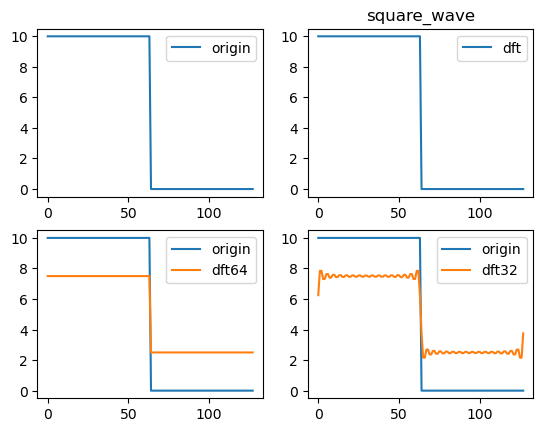

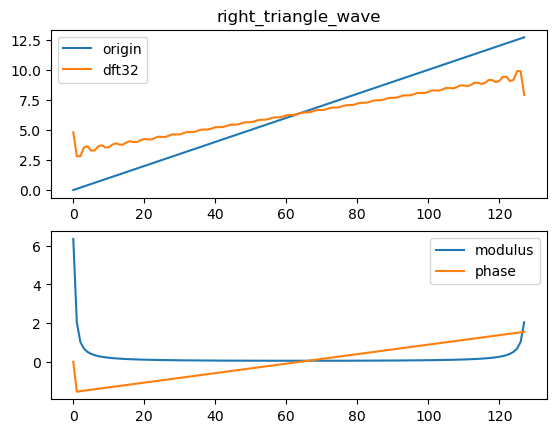

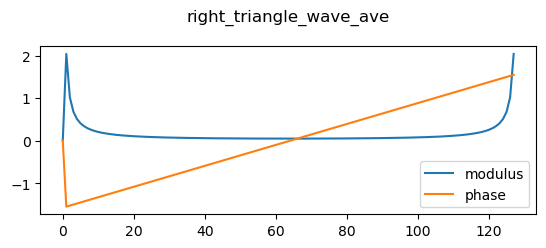

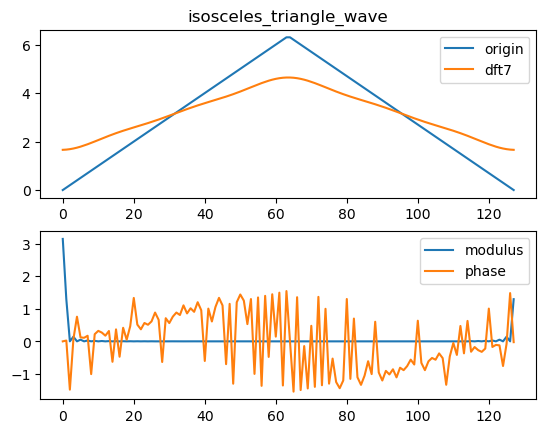

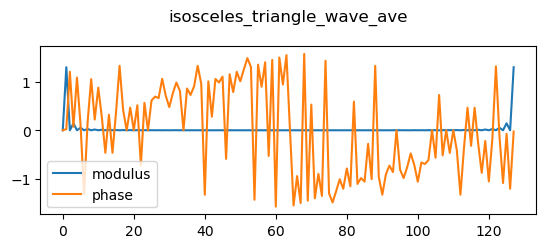

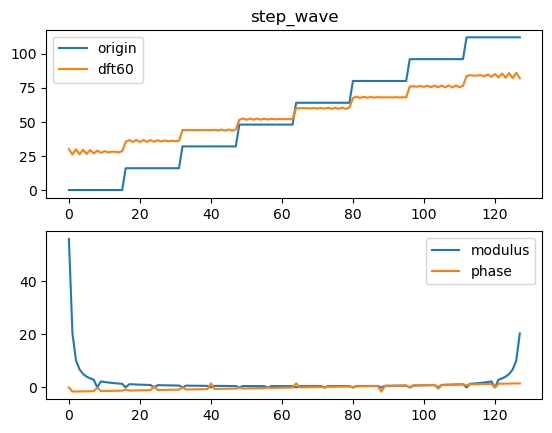

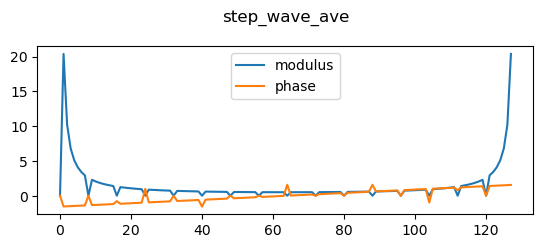

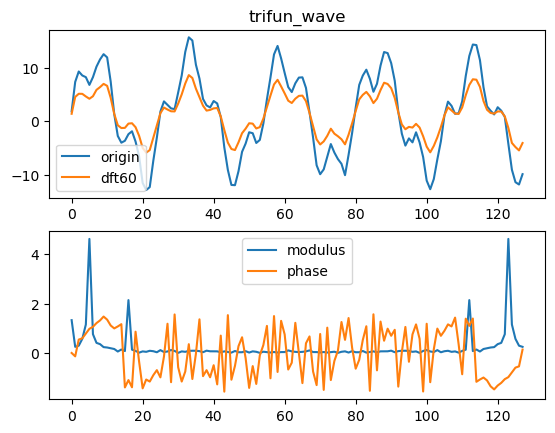

In [4]:
import numpy as np
import fourier
# from fourier import dftFloat,getDftFun
import importlib;
importlib.reload(fourier)


x_values = np.arange(0,128)

y_origin = squareWave["data"]
akArr = fourier.dftFloat(y_origin)

ft1 = fourier.getDftFun(akArr)
wave1 = np.vectorize(ft1)(x_values)
plt.subplot2grid((2,2),(0,0),)
plt.plot(x_values, y_origin, label='origin')
plt.legend()

plt.subplot2grid((2,2),(0,1))
plt.plot(x_values, wave1, label='dft')
plt.legend()

ft2 = fourier.getDftFun(akArr[:len(akArr)//2],len(akArr))
wave2 = np.vectorize(ft2)(x_values)
plt.subplot2grid((2,2),(1,0))
plt.plot(x_values, y_origin, label='origin')
plt.plot(x_values, wave2, label='dft'+str(len(akArr)//2))
plt.legend()

ft3 = fourier.getDftFun(akArr[:len(akArr)//4],len(akArr))
wave3 = np.vectorize(ft3)(x_values)
plt.subplot2grid((2,2),(1,1))
plt.plot(x_values, y_origin, label='origin')
plt.plot(x_values, wave3, label='dft'+str(len(akArr)//4))
plt.legend()
plt.title('square_wave',y=2.2)
plt.show()



def showDft(title,y_origin,showrange=None,showwave=True):
    x_values = np.arange(0,len(y_origin))
    if(showrange is None):
        showrange = len(y_origin)
    akArr = fourier.dftFloat(y_origin)

    if(showwave):
        ft = fourier.getDftFun(akArr[:showrange],len(akArr))
        wave = np.vectorize(ft)(x_values)
        plt.subplot2grid((2,2),(0,0),colspan=2)
        plt.plot(x_values, y_origin, label='origin')
        plt.plot(x_values, wave, label='dft'+str(showrange))
        plt.legend()

    modulus = fourier.getModulus(akArr)
    phase = fourier.getPhase(akArr)
    plt.subplot2grid((2,2),(1 if showwave else 0 ,0),colspan=2)
    plt.plot(x_values, modulus, label='modulus')
    plt.plot(x_values, phase, label='phase')
    plt.legend()
    plt.title(title,y=2.2 if showwave else 1.1)
    plt.show()

def showAveDft(title,y_origin,showrange=None):
    y_origin = y_origin - np.average(y_origin)
    showDft(title+"_ave",y_origin,showrange,showwave = False)


showDft("right_triangle_wave",rightTriangleWave["data"],len(rightTriangleWave["data"])//4)
showAveDft("right_triangle_wave",rightTriangleWave["data"],len(rightTriangleWave["data"])//4)
showDft("isosceles_triangle_wave",isoscelesTriangleWave["data"],7)
showAveDft("isosceles_triangle_wave",isoscelesTriangleWave["data"],7)
showDft("step_wave",stepWave["data"],60)
showAveDft("step_wave",stepWave["data"],60)
showDft("trifun_wave",triFunWave["data"],60)


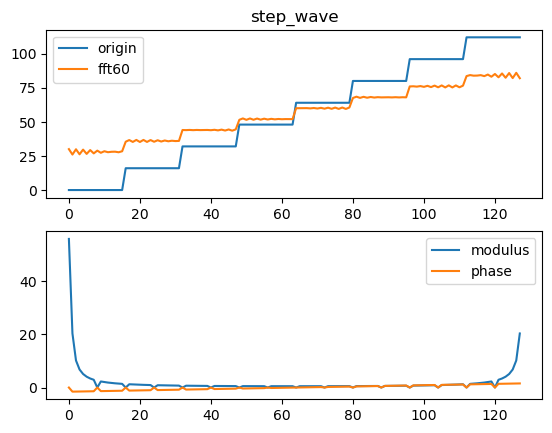

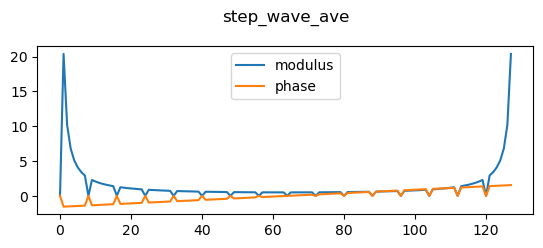

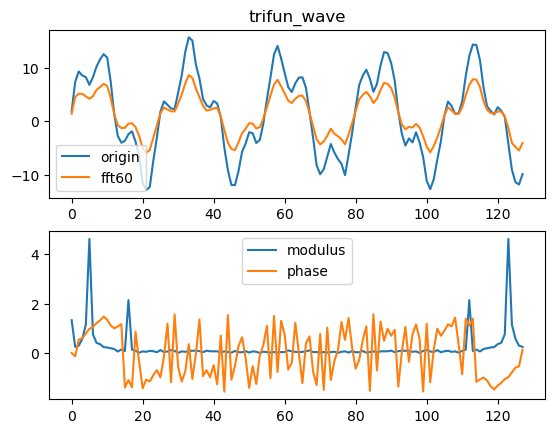

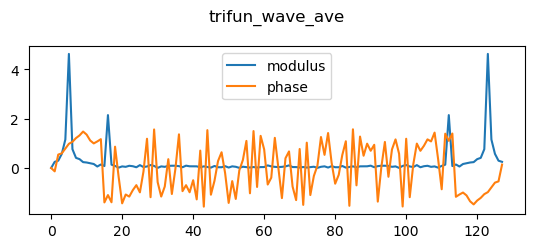

In [5]:

import fourier

import importlib;
importlib.reload(fourier)

def showFft(title,y_origin,showrange=None,showwave=True):
    x_values = np.arange(0,len(y_origin))
    if(showrange is None):
        showrange = len(y_origin)
    akArr = fourier.ditFftFloat(y_origin)

    if(showwave):
        ft = fourier.getDftFun(akArr[:showrange],len(akArr))
        wave = np.vectorize(ft)(x_values)
        plt.subplot2grid((2,2),(0,0),colspan=2)
        plt.plot(x_values, y_origin, label='origin')
        plt.plot(x_values, wave, label='fft'+str(showrange))
        plt.legend()

    modulus = fourier.getModulus(akArr)
    phase = fourier.getPhase(akArr)
    plt.subplot2grid((2,2),(1 if showwave else 0 ,0),colspan=2)
    plt.plot(x_values, modulus, label='modulus')
    plt.plot(x_values, phase, label='phase')
    plt.legend()
    plt.title(title,y=2.2 if showwave else 1.1)
    plt.show()

def showAveFft(title,y_origin,showrange=None):
    y_origin = y_origin - np.average(y_origin)
    showFft(title+"_ave",y_origin,showrange,showwave = False)


showFft("step_wave",stepWave["data"],60)
showAveFft("step_wave",stepWave["data"],60)
showFft("trifun_wave",triFunWave["data"],60)
showAveFft("trifun_wave",triFunWave["data"],60)